<a href="https://colab.research.google.com/github/ngabo-dev/linear_regression_model/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Task 1: Linear Regression Task


Step 1: Data Preprocessing

In [ ]:
  # data_preprocessing
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler, LabelEncoder
  from sklearn.impute import SimpleImputer
  
  # Load dataset
  df = pd.read_csv("Students_Grading_Dataset.csv")
  
  # Drop unnecessary columns
  df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'], inplace=True)
  
  # Encode categorical variables
  categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home',
                      'Parent_Education_Level', 'Family_Income_Level']
  label_encoders = {}
  
  for col in categorical_cols:
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])
      label_encoders[col] = le
  
  # Impute missing values using median strategy
  imputer = SimpleImputer(strategy="median")
  df[df.select_dtypes(include=['number']).columns] = imputer.fit_transform(df.select_dtypes(include=['number']))
  
  # Check if any NaN remains
  print(df.isnull().sum())
  
  # Define target variable
  X = df.drop(columns=['Final_Score', 'Grade'])
  y = df['Final_Score']
  
  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  # Normalize features
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64


Step 2: Train & Evaluate Models

Linear Regression MSE: 293.5717724644617
Decision Tree MSE: 602.0916088
Random Forest MSE: 303.47909992137005


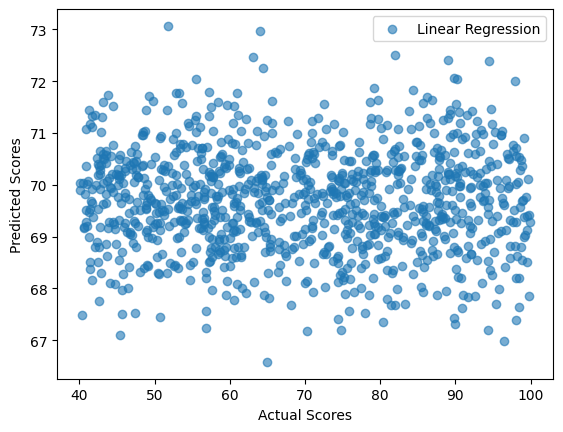

In [3]:
# model_training.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Compare performance
print(f"Linear Regression MSE: {mse_lr}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"Random Forest MSE: {mse_rf}")

# Save the best model
import joblib
best_model = rf_model if mse_rf < mse_lr and mse_rf < mse_dt else (lr_model if mse_lr < mse_dt else dt_model)
joblib.dump(best_model, "best_model.pkl")

# Plot loss curve
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.legend()
plt.show()